In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [65]:
dados = pd.read_csv('SLOAN.csv')

In [66]:
dados.head()

,ra,dec,classe,B-V,FeH,LogG,TEff,g,i,r,u,z,subclasse,redshift
0,319.81589,-3.040641,GALAXY,0.0,0.0,0.0,0.0,0.392922,6.778811,2.759049,0.485811,11.827832,NaN,0.467188
1,319.88321,-2.850937,GALAXY,0.0,0.0,0.0,0.0,1.766572,16.866549,9.214419,0.655763,25.678196,NaN,0.335941
2,319.78827,-2.945794,GALAXY,0.0,0.0,0.0,0.0,0.747166,9.018719,3.880855,0.313001,15.715904,NaN,0.527530
3,319.84679,-3.035874,GALAXY,0.0,0.0,0.0,0.0,0.983140,17.727135,7.228017,0.267782,29.746500,NaN,0.464057
4,319.80725,-2.721654,GALAXY,0.0,0.0,0.0,0.0,1.863380,23.468472,11.459862,0.789074,37.659229,NaN,0.400421


Text(0, 0.5, 'Quantidade')

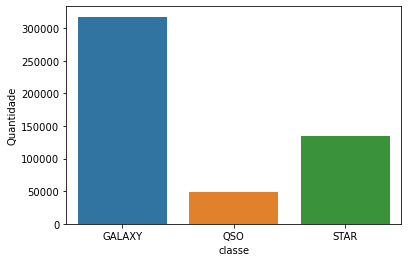

In [67]:
sns.countplot(x=dados['classe'])
plt.ylabel('Quantidade')

In [68]:
estrelas = dados[dados['classe']=='STAR']
galaxias = dados[dados['classe']=='GALAXY']
qso = dados[dados['classe']=='QSO']

In [69]:
estrelas.head(1)

,ra,dec,classe,B-V,FeH,LogG,TEff,g,i,r,u,z,subclasse,redshift
9,319.89143,-2.631664,STAR,0.18,-2.09,2.497,6537.0,1.874528,5.158816,4.124888,0.795603,5.396394,K3V (32147),-0.000768


In [70]:
def tipo_espectral(x):
    return x[0]

In [71]:
estrelas['Espectro_Tipo'] = estrelas['subclasse'].apply(tipo_espectral)

<ipython-input-71-65275206cd30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estrelas['Espectro_Tipo'] = estrelas['subclasse'].apply(tipo_espectral)


In [72]:
estrelas.head()

,ra,dec,classe,B-V,FeH,LogG,TEff,g,i,r,u,z,subclasse,redshift,Espectro_Tipo
9,319.89143,-2.631664,STAR,0.180,-2.09,2.497,6537.0,1.874528,5.158816,4.124888,0.795603,5.396394,K3V (32147),-0.000768,K
11,319.93173,-2.513280,STAR,0.180,-2.09,2.497,6537.0,52.229191,240.609756,163.884537,5.126666,287.497894,K5Ve (118100),-0.000036,K
17,319.69723,-2.875851,STAR,0.429,-0.41,4.110,6180.0,0.710564,8.083809,2.986172,0.168455,14.090108,M5III (221615),-0.000227,M
21,319.67268,-2.893204,STAR,0.647,-2.32,1.320,4949.0,2.813756,37.540585,9.894195,0.741145,83.796005,M5III (221615),-0.000091,M
36,319.65156,-3.240867,STAR,0.647,-2.32,1.320,4949.0,0.664964,5.622318,2.512684,0.421322,9.896644,M1 (204445),0.000034,M


<AxesSubplot:xlabel='B-V', ylabel='TEff'>

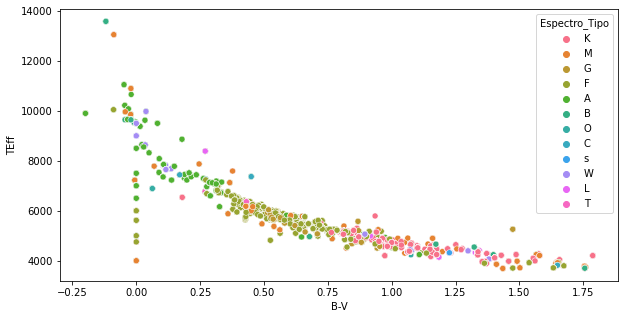

In [103]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=estrelas['B-V'],y=estrelas['TEff'],hue='Espectro_Tipo',data=estrelas)

<AxesSubplot:xlabel='Espectro_Tipo', ylabel='count'>

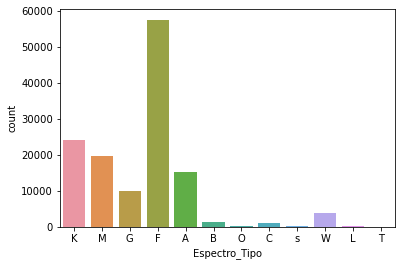

In [74]:
sns.countplot(x=estrelas['Espectro_Tipo'])

In [104]:
estrelas.to_csv('Estrelas_SLOAN.csv',index=False)

In [75]:
galaxias.head(1)

,ra,dec,classe,B-V,FeH,LogG,TEff,g,i,r,u,z,subclasse,redshift
0,319.81589,-3.040641,GALAXY,0.0,0.0,0.0,0.0,0.392922,6.778811,2.759049,0.485811,11.827832,NaN,0.467188


In [76]:
galaxias['subclasse'].value_counts()

STARFORMING              55258
STARBURST                13669
AGN                       4381
BROADLINE                 3530
AGN BROADLINE              611
STARFORMING BROADLINE      274
STARBURST BROADLINE         34
Name: subclasse, dtype: int64

In [77]:
def fix_subclasse(x):
    if(x=='AGN BROADLINE'):
        return 'AGN'
    elif(x=='STARFORMING BROADLINE'):
        return 'STARFORMING'
    elif(x=='STARBURST BROADLINE'):
        return 'STARBURST'
    else:
        return x

In [78]:
galaxias['subclasse'] = galaxias['subclasse'].apply(fix_subclasse)

<ipython-input-78-84e2a6b4235d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxias['subclasse'] = galaxias['subclasse'].apply(fix_subclasse)


<AxesSubplot:xlabel='subclasse', ylabel='count'>

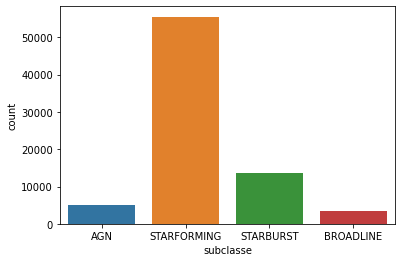

In [80]:
sns.countplot(x=galaxias['subclasse'])

In [81]:
galaxias = galaxias.drop(['B-V','FeH','LogG','TEff'],axis=1)

In [82]:
galaxias.head()

,ra,dec,classe,g,i,r,u,z,subclasse,redshift
0,319.81589,-3.040641,GALAXY,0.392922,6.778811,2.759049,0.485811,11.827832,NaN,0.467188
1,319.88321,-2.850937,GALAXY,1.766572,16.866549,9.214419,0.655763,25.678196,NaN,0.335941
2,319.78827,-2.945794,GALAXY,0.747166,9.018719,3.880855,0.313001,15.715904,NaN,0.527530
3,319.84679,-3.035874,GALAXY,0.983140,17.727135,7.228017,0.267782,29.746500,NaN,0.464057
4,319.80725,-2.721654,GALAXY,1.863380,23.468472,11.459862,0.789074,37.659229,NaN,0.400421


In [105]:
galaxias.to_csv('Galaxias_SLOAN.csv',index=False)

In [ ]:
galaxias_teste = galaxias[galaxias['subclasse'].isna()]

In [94]:
galaxias = galaxias.dropna(subset=['subclasse'])